In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline
import sys

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [3]:
#challenge 1
df1 = pd.read_csv('~/ds/metis/Challenges/Challenge_1/data/turnstile_180616.txt')
df2 = pd.read_csv('~/ds/metis/Challenges/Challenge_1/data/turnstile_180623.txt')
df3 = pd.read_csv('~/ds/metis/Challenges/Challenge_1/data/turnstile_180630.txt')


In [4]:
df1['wk'] = 0
df2['wk'] = 1
df3['wk'] = 2
df =pd.concat([df1,df2,df3],ignore_index=True)

df.rename(columns={"C/A":"CA"}, inplace=True)
df.columns=df.columns.str.strip()

df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,wk
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,0


In [5]:
#Challenge 2
df['DATETIME']=df['DATE'].map(str)+' '+df['TIME']
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,wk,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182,0,2018-06-09 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,0,2018-06-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,0,2018-06-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,0,2018-06-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,0,2018-06-09 16:00:00


In [6]:
#Challenge 3 - group and diff
df['turnstile'] = df['CA'] + " " + df['SCP']
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,wk,DATETIME,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182,0,2018-06-09 00:00:00,A002 02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,0,2018-06-09 04:00:00,A002 02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,0,2018-06-09 08:00:00,A002 02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,0,2018-06-09 12:00:00,A002 02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,0,2018-06-09 16:00:00,A002 02-00-00


In [7]:
df['ENTRYDIFFS']=(df.sort_values(by=['STATION','UNIT','CA','SCP']).groupby(['STATION','UNIT','CA','DATE'])['ENTRIES'].diff())

In [8]:
#clear out values don't make sense
df.loc[df['ENTRYDIFFS'] < 0, 'ENTRYDIFFS'] = 0
df.loc[df['ENTRYDIFFS'] > (20*60*4), 'ENTRYDIFFS'] = 0

In [9]:
df_daily=(df.sort_values(by=['turnstile','DATE'])
                  .groupby(['turnstile','DATE'])['ENTRYDIFFS'].sum()).reset_index()
df_daily.sample(10)

,turnstile,DATE,ENTRYDIFFS
46759,N505 02-00-05,06/22/2018,515.0
72272,R204 02-03-00,06/25/2018,342.0
79764,R258 00-00-04,06/13/2018,3825.0
79321,R252 00-00-02,06/28/2018,1722.0
31501,N124 00-00-00,06/23/2018,220.0
90052,R525 02-06-00,06/19/2018,51.0
62754,R114 02-00-01,06/18/2018,548.0
40987,N332 01-06-01,06/25/2018,1474.0
20922,N009 01-00-00,06/17/2018,1291.0
35348,N212 01-00-01,06/21/2018,649.0


In [10]:
df_daily = df_daily.set_index(['turnstile'])
df_daily.head()

,DATE,ENTRYDIFFS
turnstile,,
A002 02-00-00,06/09/2018,604.0
A002 02-00-00,06/10/2018,480.0
A002 02-00-00,06/11/2018,1302.0
A002 02-00-00,06/12/2018,1246.0
A002 02-00-00,06/13/2018,1190.0


([<matplotlib.axis.XTick at 0x12c50cdd8>,
 <a list of 11 Text xticklabel objects>)

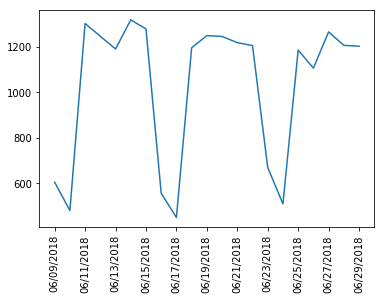

In [11]:
# challenge 4
df_toplot = df_daily.query("turnstile == 'A002 02-00-00'")
x = df_toplot.DATE; y = df_toplot.ENTRYDIFFS
plt.plot(x, y)
plt.xticks(range(0,len(x),2), df_toplot.DATE[::2], rotation=90)


In [12]:
# challenge 5

df4=(df.sort_values(by=['STATION','UNIT','CA'])
                  .groupby(['STATION','UNIT','CA','DATE'], as_index=False)['ENTRYDIFFS'].sum())

df4.sample(10)

,STATION,UNIT,CA,DATE,ENTRYDIFFS
3420,34 ST-PENN STA,R293,R138,06/18/2018,44250.0
3804,46 ST,R267,N316A,06/14/2018,3859.0
1704,174-175 STS,R253,N212,06/13/2018,2275.0
13704,ROCKAWAY AV,R439,N122,06/09/2018,2056.0
8971,DYCKMAN ST,R185,N003,06/21/2018,6605.0
8379,CLEVELAND ST,R435,J022,06/13/2018,2997.0
3072,34 ST-HERALD SQ,R022,A022,06/27/2018,14336.0
4470,59 ST,R050,R244,06/29/2018,9867.0
6591,BAY RIDGE-95 ST,R216,C027,06/29/2018,3305.0
2194,21 ST-QNSBRIDGE,R303,N603,06/20/2018,10900.0


In [13]:
# challenge 6

df5=(df.sort_values(by=['STATION','DATE'])
                  .groupby(['STATION','DATE'], as_index=False)['ENTRYDIFFS'].sum())

df5

,STATION,DATE,ENTRYDIFFS
0,1 AV,06/09/2018,15092.0
1,1 AV,06/10/2018,11672.0
2,1 AV,06/11/2018,18084.0
3,1 AV,06/12/2018,18848.0
4,1 AV,06/13/2018,18948.0
5,1 AV,06/14/2018,19411.0
6,1 AV,06/15/2018,18035.0
7,1 AV,06/16/2018,14160.0
8,1 AV,06/17/2018,10770.0
9,1 AV,06/18/2018,17287.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

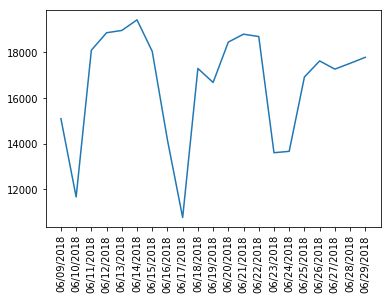

In [14]:
# challenge 7

df6 = df5.loc[df5['STATION']=='1 AV']
plt.plot(df6['DATE'], df6['ENTRYDIFFS'])
plt.xticks(rotation=90)

In [16]:
# challenge 8

df7=(df.sort_values(by=['STATION','DATE'])
                  .groupby(['STATION','DATE','wk'], as_index=False)['ENTRYDIFFS'].sum())



df7=df7.loc[df7['STATION']=='1 AV']
df7['wkday']= list(range(1,8))*3

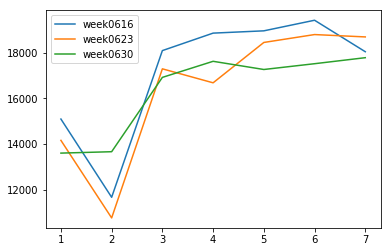

In [20]:
week_0 = df7.loc[df7['wk']==0][['wkday','ENTRYDIFFS']]
week_1 = df7.loc[df7['wk']==1][['wkday','ENTRYDIFFS']]
week_2 = df7.loc[df7['wk']==2][['wkday','ENTRYDIFFS']]

plt.plot(week_0['wkday'], week_0['ENTRYDIFFS'])
plt.plot(week_1['wkday'], week_1['ENTRYDIFFS'])
plt.plot(week_2['wkday'], week_2['ENTRYDIFFS'])
plt.legend(['week0616','week0623','week0630'],shadow = False)

In [21]:
# challenge 9

df8=(df.sort_values(by=['STATION','DATE'], ascending=False)
                  .groupby(['STATION'], as_index=False)['ENTRYDIFFS'].sum())


df8=df8.sort_values(by=['ENTRYDIFFS'], ascending=False)
df8.head()


,STATION,ENTRYDIFFS
60,34 ST-PENN STA,2.756e+06
232,GRD CNTRL-42 ST,2.451e+06
58,34 ST-HERALD SQ,1.784e+06
45,23 ST,1.741e+06
14,14 ST-UNION SQ,1.709e+06


(array([273.,  66.,  18.,   8.,   4.,   2.,   4.,   0.,   1.,   1.]),
 array([3.1200000e+02, 2.7584640e+05, 5.5138080e+05, 8.2691520e+05,
        1.1024496e+06, 1.3779840e+06, 1.6535184e+06, 1.9290528e+06,
        2.2045872e+06, 2.4801216e+06, 2.7556560e+06]),
 <a list of 10 Patch objects>)

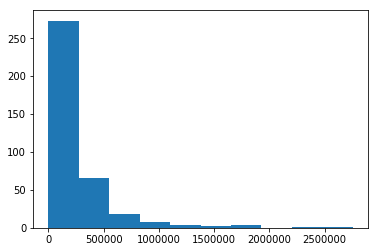

In [22]:
# challenge 10
total_ridership_counts = df8['ENTRYDIFFS']
plt.hist(total_ridership_counts)

<Container object of 377 artists>

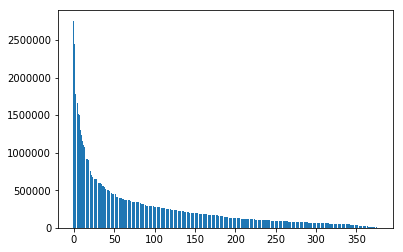

In [23]:
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts)
